# Previsão de Análise de Crédito

Vamos analisar o dataframe 'Credit Risk Dataset' do Kaggle.
Nosso objetivo é construir diversos modelos de Machine Learning, testar eles e identificar quais são os melhores após as devidas avaliações.
Vamos testar os modelos 'Neural Network', 'Gradient Boosting', 'Random Forest', 'XGBoost', 'SVM', 'KNN', 'Logistic Regression' e 'Naive Bayes'

In [2]:
# Vamos começar importando as bibliotecas iniciais necessárias para realizar nosso projeto.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# https://www.kaggle.com/datasets/laotse/credit-risk-dataset

- Feature Name:	                    Description
- person_age:	                    Age
- person_income:	                Annual Income
- person_home_ownership:	        Home ownership
- person_emp_length:	            Employment length (in years)
- loan_intent:	                    Loan intent
- loan_grade:	                    Loan grade
- loan_amnt:	                    Loan amount
- loan_int_rate:	                Interest rate
- loan_status:	                    Loan status (0 is non default 1 is default)
- loan_percent_income:	            Percent income
- cb_person_default_on_file:	    Historical default
- cb_preson_cred_hist_length:	    Credit history length

# 1 - Análise Exploratória e Estatística

In [3]:
# Começaremos usando a biblioteca 'Pandas' parar ler o conjunto de dados 'credit_risk_dataset.csv'
credit_df = pd.read_csv(r"C:\Users\yamas\Downloads\archive (8)\credit_risk_dataset.csv", index_col=0)

# Vamos ver as 5 primeiras e as 5 últimas linhas do dataframe para verificar os dados.
credit_df

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,,,,,,,,,,,
22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28


In [4]:
# Utilizaremos o atributo 'dtypes' do dataframe credit_df para verificar os tipos de dados de cada coluna.
credit_df.dtypes

person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [5]:
# Utilizaremos aqui o método 'describe()' para verificar alguns dados descritivos sobre as colunas numéricas do dataframe 'credit_df'
credit_df.describe() 

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
# Utilizaremos os métodos 'isnull' e 'sum' para somar os valores nulos existentes em cada coluna
credit_df.isnull().sum()

person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

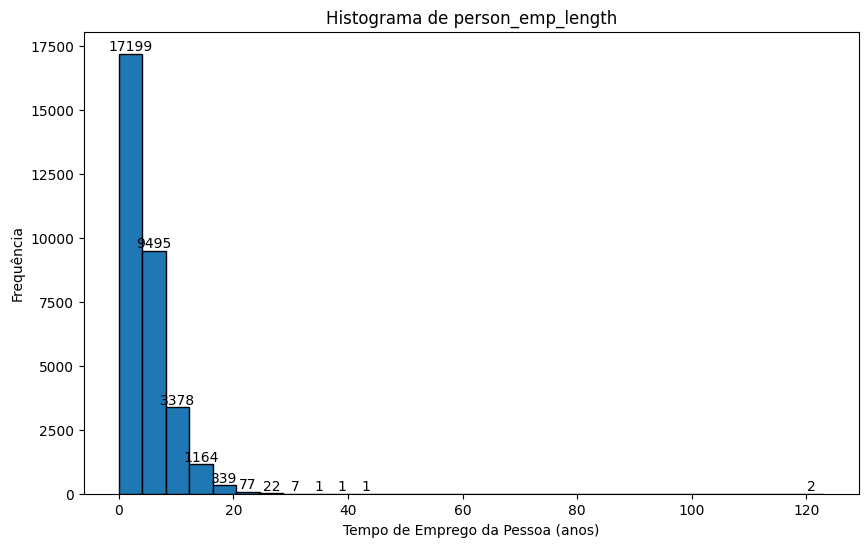

In [7]:
# Utilizaremos a biblioteca matplotlib para verificar como está a distribuição de dados na coluna 'person_emp_lenght'

# Criar o histograma
plt.figure(figsize=(10, 6))
n, bins, _ = plt.hist(credit_df['person_emp_length'].dropna(), bins=30, edgecolor='black')

# Adicionar os números específicos em cima das barras
for count, value in zip(n, bins[:-1]):
    if count > 0:
        plt.text(value + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

# Configurar o título e rótulos dos eixos
plt.title('Histograma de person_emp_length')
plt.xlabel('Tempo de Emprego da Pessoa (anos)')
plt.ylabel('Frequência')

# Mostrar o gráfico
plt.show()

Um outlier foi detectado acima de 120 e vamos tratá-lo abaixo na próxima etapa.

# 2 - Tratamento de Dados

Primeiramente, iremos tratar os valores nulos que detectamos em nosso dataframe na etapa anterior.

"person_emp_length" e "loan_int_rate" são as nossas colunas que possuem valores nulos em nosso conjunto de dados.                              

In [8]:
# Criar uma função para substituir os valores nulos pelo valor médio de uma determinada coluna.
def replace_nan_with_median(dataframe, column_name):
    median_value = dataframe[column_name].median()
    dataframe[column_name].fillna(median_value, inplace=True)

In [9]:
# Usando a função para substituir os valores em branco em 'person_emp_length'
replace_nan_with_median(credit_df, 'person_emp_length')

# Verificar se as substituições foram bem sucedidas:
credit_df.isnull().sum()

person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

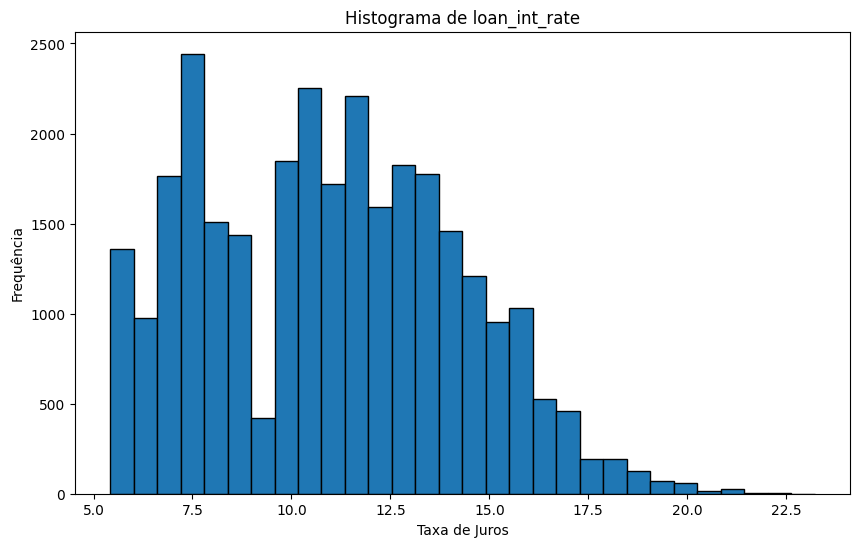

In [10]:
# Criar um histograma para verificar a distribuição de dados da coluna 'loan_int_rate'
plt.figure(figsize=(10, 6))
plt.hist(credit_df['loan_int_rate'], bins=30, edgecolor='black')
plt.title('Histograma de loan_int_rate')
plt.xlabel('Taxa de Juros')
plt.ylabel('Frequência')
plt.show()

In [11]:
# Usando a função para substituir os valores em branco em 'loan_int_rate'
replace_nan_with_median(credit_df, 'loan_int_rate')

# Verificar se ainda existem valores em branco:
credit_df.isnull().sum()

person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Como é impossível um ser humano estar empregado há mais de 120 anos, decidimos remover o outlier.

In [12]:
def remove_values_above_max(dataframe, column_name, max_value):
    dataframe.drop(dataframe[dataframe[column_name] > max_value].index, inplace=True)

In [13]:
# Usando a função para substituir os valores maiores que 120 em 'person_emp_length'
remove_values_above_max(credit_df, 'person_emp_length', 120)

# Verificar se os valores foram removidos corretamente
# Aqui vamos verificar o maior valor dessa coluna.
credit_df['person_emp_length'].max()

41.0

In [14]:
# Verificaremos novamente as estatísticas das classes numéricas.
# Observe que em person_emp_length não tem mais valores impossíveis de acontecer, principalmente em 'max'.
credit_df.describe()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,2.771900e+04,27719.000000,27719.000000,27719.000000,27719.000000,27719.000000,27719.000000
mean,6.883168e+04,4.976406,9790.078105,11.013774,0.211119,0.167551,6.297197
std,6.588648e+04,4.180805,6429.438489,3.090188,0.408110,0.105684,4.192908
min,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,4.000000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,5.800000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,5.000000
75%,8.200000e+04,7.000000,13000.000000,13.110000,0.000000,0.230000,9.000000
max,6.000000e+06,41.000000,35000.000000,23.220000,1.000000,0.780000,30.000000


Aparentemente o dataset não possui mais outliers a serem tratados.

Agora iremos tratar os tipos de dados que estão errados em nosso dataframe.

In [15]:
# Analisaremos aqui os tipos de dados de cada coluna.
credit_df.dtypes

person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [16]:
# Verificaremos os primeiros dados do dataframe.
credit_df.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,,,,,,,,,,,
25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4


In [17]:
# Verificar se os dados únicos estão corretos na coluna 'cb_person_default_on_file'.
credit_df['cb_person_default_on_file'].unique()

array(['N', 'Y'], dtype=object)

Aparentemente a coluna 'cb_person_default_on_file' possui apenas dois tipos de entrada 'Y' para 'Yes' e 'N' para 'No'. Vamos transformá-la para o formator 'Boolean' para ficar melhor aplicada nos modelos de machine learning.

In [18]:
def transform_values(dataframe, column_name, value_mapping):
    dataframe[column_name] = dataframe[column_name].map(value_mapping)

In [19]:
# Usando a função para transformar 'Y' em True e 'N' em False em 'cb_person_default_on_file'
transform_values(credit_df, 'cb_person_default_on_file', {'Y': True, 'N': False})

# Verificando se a transformação foi aplicada corretamente
credit_df['cb_person_default_on_file'].unique()

array([False,  True])

O código credit_df['cb_person_default_on_file'] == 'Y' cria uma série booleana (True/False) com base na comparação entre cada valor da coluna 'cb_person_default_on_file' e a string 'Y'. Em outras palavras, ele avalia se cada valor da coluna é igual a 'Y'.

In [20]:
# Mais uma vez verificamos como estão as primeiras linhas do dataframe como estão após as alterações.
credit_df.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,,,,,,,,,,,
25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,False,3
23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,False,2
24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,True,4
26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,False,3
24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,False,4


In [21]:
# Verificaremos se o tipo de dado em 'cb_person_default_on_file' mudaram pala boolean.
credit_df.dtypes

person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file        bool
cb_person_cred_hist_length      int64
dtype: object

Realizar uma última análise de dados

In [22]:
# Verificar os valores únicos em person_home_ownership.
credit_df['person_home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER'], dtype=object)

In [23]:
# Verificar os valores únicos em loan_intent. 
credit_df['loan_intent'].unique()

array(['MEDICAL', 'EDUCATION', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT'], dtype=object)

In [24]:
# Verificar os valores únicos em loan_grade. 
credit_df['loan_grade'].unique()

array(['C', 'B', 'A', 'E', 'F', 'D', 'G'], dtype=object)

Aplicar One Hot Encoding nas colunas do tipo 'object'.

In [25]:
# Selecionar colunas categóricas para aplicar one-hot encoding
columns_to_encode = ['person_home_ownership', 'loan_intent', 'loan_grade']

# Aplicar one-hot encoding
credit_df = pd.get_dummies(credit_df, columns=columns_to_encode)
credit_df.head()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
person_age,,,,,,,,,,,,,,,,,,,,,
25,9600,1.0,5500,12.87,1,0.57,False,3,True,False,...,True,False,False,False,False,True,False,False,False,False
23,65500,4.0,35000,15.23,1,0.53,False,2,False,False,...,True,False,False,False,False,True,False,False,False,False
24,54400,8.0,35000,14.27,1,0.55,True,4,False,False,...,True,False,False,False,False,True,False,False,False,False
26,77100,8.0,35000,12.42,1,0.45,False,3,False,False,...,False,False,False,False,True,False,False,False,False,False
24,78956,5.0,35000,11.11,1,0.44,False,4,False,False,...,True,False,False,False,True,False,False,False,False,False


In [26]:
# Exibindo as primeiras linhas do DataFrame com as colunas codificadas
credit_df.head()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
person_age,,,,,,,,,,,,,,,,,,,,,
25,9600,1.0,5500,12.87,1,0.57,False,3,True,False,...,True,False,False,False,False,True,False,False,False,False
23,65500,4.0,35000,15.23,1,0.53,False,2,False,False,...,True,False,False,False,False,True,False,False,False,False
24,54400,8.0,35000,14.27,1,0.55,True,4,False,False,...,True,False,False,False,False,True,False,False,False,False
26,77100,8.0,35000,12.42,1,0.45,False,3,False,False,...,False,False,False,False,True,False,False,False,False,False
24,78956,5.0,35000,11.11,1,0.44,False,4,False,False,...,True,False,False,False,True,False,False,False,False,False


In [27]:
# Verificaremos como ficaram as colunas após a aplicação do One Hot Encoding.
# Observe como a quantidade de colunas mudaram.
credit_df.columns

Index(['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G'],
      dtype='object')

In [28]:
# Vamos verificar os tipos de dados das colunas.
# Observe que todas as novas colunas são booleans.
credit_df.dtypes

person_income                       int64
person_emp_length                 float64
loan_amnt                           int64
loan_int_rate                     float64
loan_status                         int64
loan_percent_income               float64
cb_person_default_on_file            bool
cb_person_cred_hist_length          int64
person_home_ownership_MORTGAGE       bool
person_home_ownership_OTHER          bool
person_home_ownership_OWN            bool
person_home_ownership_RENT           bool
loan_intent_DEBTCONSOLIDATION        bool
loan_intent_EDUCATION                bool
loan_intent_HOMEIMPROVEMENT          bool
loan_intent_MEDICAL                  bool
loan_intent_PERSONAL                 bool
loan_intent_VENTURE                  bool
loan_grade_A                         bool
loan_grade_B                         bool
loan_grade_C                         bool
loan_grade_D                         bool
loan_grade_E                         bool
loan_grade_F                      

Iremos normalizar os dados agora para poder trabalhar melhor com eles nos modelos de Machine Learning.

- Normalização refere-se ao processo de ajustar a escala dos dados para que eles tenham uma média zero e um desvio padrão de 1. O StandardScaler realiza essa normalização subtraindo a média de cada recurso e, em seguida, dividindo pelo desvio padrão. Isso ajuda a garantir que os dados tenham uma distribuição mais uniforme e podem melhorar o desempenho de muitos algoritmos de aprendizado de máquina.

In [29]:
from sklearn.preprocessing import StandardScaler

# Selecionar apenas as colunas numéricas para a padronização
numeric_columns = credit_df.select_dtypes(include=['float64', 'int64']).columns

# Excluir a coluna 'loan_status' das colunas numéricas
numeric_columns = numeric_columns.drop('loan_status')

# Criar uma cópia do DataFrame para evitar modificar o original
credit_df_scaled = credit_df.copy()

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar a padronização apenas nas colunas numéricas
credit_df_scaled[numeric_columns] = scaler.fit_transform(credit_df[numeric_columns])

# Exibir as primeiras linhas do DataFrame padronizado
print(credit_df_scaled.head())


            person_income  person_emp_length  loan_amnt  loan_int_rate  \
person_age                                                               
25              -0.899012          -0.951127  -0.667268       0.600695   
23              -0.050568          -0.233549   3.921085       1.364416   
24              -0.219042           0.723222   3.921085       1.053750   
26               0.125496           0.723222   3.921085       0.455070   
24               0.153666           0.005643   3.921085       0.031140   

            loan_status  loan_percent_income  cb_person_default_on_file  \
person_age                                                                
25                    1             3.808117                      False   
23                    1             3.429622                      False   
24                    1             3.618870                       True   
26                    1             2.672633                      False   
24                    1        

# 3 - Construção e Teste de Modelos de Machine Learning

Vamos realizar a construção de nossos modelos de Machine Learning.

Iremos também realizar algumas 'GridSearch' para encontrar os melhores parâmetros para determinados algoritmos.

Após isso vamos testar nossos algoritmos para observar seu desempenho.

In [30]:
from sklearn.model_selection import train_test_split

# Separar a variável alvo das outras
X = credit_df_scaled.drop('loan_status', axis=1)  # Features (variáveis independentes)
y = credit_df_scaled['loan_status']  # Variável alvo (rótulos)

# Dividir os conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Exibir as dimensões dos conjuntos
print(f'Dimensões do conjunto de treino: X_train - {X_train.shape}, y_train - {y_train.shape}')
print(f'Dimensões do conjunto de teste: X_test - {X_test.shape}, y_test - {y_test.shape}')

Dimensões do conjunto de treino: X_train - (22175, 24), y_train - (22175,)
Dimensões do conjunto de teste: X_test - (5544, 24), y_test - (5544,)


Regressão Logística

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar o modelo de Regressão Logística
model = LogisticRegression(max_iter=150, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy_ln = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Exibir métricas de desempenho
print(f'Acurácia: {accuracy_ln:.4f}')
print(f'Matriz de Confusão:\n{conf_matrix}')
print(f'Relatório de Classificação:\n{classification_rep}')

Acurácia: 0.8635
Matriz de Confusão:
[[4174  216]
 [ 541  613]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4390
           1       0.74      0.53      0.62      1154

    accuracy                           0.86      5544
   macro avg       0.81      0.74      0.77      5544
weighted avg       0.85      0.86      0.85      5544



Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Treinar o modelo
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Exibir métricas de desempenho
print(f'Acurácia Random Forest: {accuracy_rf:.4f}')
print(f'Matriz de Confusão Random Forest:\n{conf_matrix_rf}')
print(f'Relatório de Classificação Random Forest:\n{classification_rep_rf}')


Acurácia Random Forest: 0.9324
Matriz de Confusão Random Forest:
[[4361   29]
 [ 346  808]]
Relatório de Classificação Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4390
           1       0.97      0.70      0.81      1154

    accuracy                           0.93      5544
   macro avg       0.95      0.85      0.89      5544
weighted avg       0.93      0.93      0.93      5544



Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar o modelo Gradient Boosting
gb_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=150, subsample=0.9, random_state=42)

# Treinar o modelo
gb_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_gb = gb_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Exibir métricas de desempenho
print(f'Acurácia Gradient Boosting: {accuracy_gb:.4f}')
print(f'Matriz de Confusão Gradient Boosting:\n{conf_matrix_gb}')
print(f'Relatório de Classificação Gradient Boosting:\n{classification_rep_gb}')


Acurácia Gradient Boosting: 0.9325
Matriz de Confusão Gradient Boosting:
[[4349   41]
 [ 333  821]]
Relatório de Classificação Gradient Boosting:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4390
           1       0.95      0.71      0.81      1154

    accuracy                           0.93      5544
   macro avg       0.94      0.85      0.89      5544
weighted avg       0.93      0.93      0.93      5544



Realizei uma GridSearch para encontrar os melhores parâmetros. Deixei o código abaixo comentado.

In [35]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Definir os parâmetros a serem ajustados
# param_grid_gb = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'subsample': [0.8, 0.9, 1.0]
# }

# # Inicializar o modelo Gradient Boosting
# gb_model = GradientBoostingClassifier(random_state=42)

# # Criar o objeto GridSearchCV
# grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# # Executar a busca em grade nos dados de treino
# grid_search_gb.fit(X_train, y_train)

# # Melhores parâmetros encontrados
# best_params_gb = grid_search_gb.best_params_

# # Treinar o modelo com os melhores parâmetros
# best_model_gb = grid_search_gb.best_estimator_
# best_model_gb.fit(X_train, y_train)

# # Fazer previsões no conjunto de teste
# y_pred_gb = best_model_gb.predict(X_test)

# # Avaliar o desempenho do modelo
# accuracy_gb = accuracy_score(y_test, y_pred_gb)
# conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
# classification_rep_gb = classification_report(y_test, y_pred_gb)

# # Exibir métricas de desempenho e melhores parâmetros
# print(f'Melhores Parâmetros Gradient Boosting: {best_params_gb}')
# print(f'Acurácia Gradient Boosting: {accuracy_gb:.4f}')
# print(f'Matriz de Confusão Gradient Boosting:\n{conf_matrix_gb}')
# print(f'Relatório de Classificação Gradient Boosting:\n{classification_rep_gb}')
# # Sem gridsearch o resultado tinha sido de 0.9265, logo não melhorou muito.

XGBoost 

In [36]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar o modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Treinar o modelo
xgb_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_xgb = xgb_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Exibir métricas de desempenho
print(f'Acurácia XGBoost: {accuracy_xgb:.4f}')
print(f'Matriz de Confusão XGBoost:\n{conf_matrix_xgb}')
print(f'Relatório de Classificação XGBoost:\n{classification_rep_xgb}')

Acurácia XGBoost: 0.9309
Matriz de Confusão XGBoost:
[[4340   50]
 [ 333  821]]
Relatório de Classificação XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4390
           1       0.94      0.71      0.81      1154

    accuracy                           0.93      5544
   macro avg       0.94      0.85      0.88      5544
weighted avg       0.93      0.93      0.93      5544



In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar o modelo SVM
svm_model = SVC(random_state=42)

# Treinar o modelo
svm_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_svm = svm_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Exibir métricas de desempenho
print(f'Acurácia SVM: {accuracy_svm:.4f}')
print(f'Matriz de Confusão SVM:\n{conf_matrix_svm}')
print(f'Relatório de Classificação SVM:\n{classification_rep_svm}')

Acurácia SVM: 0.9123
Matriz de Confusão SVM:
[[4327   63]
 [ 423  731]]
Relatório de Classificação SVM:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4390
           1       0.92      0.63      0.75      1154

    accuracy                           0.91      5544
   macro avg       0.92      0.81      0.85      5544
weighted avg       0.91      0.91      0.91      5544



In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar o modelo KNN
knn_model = KNeighborsClassifier(metric= 'manhattan', n_neighbors=9, weights='distance')

# Treinar o modelo
knn_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_knn = knn_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Exibir métricas de desempenho
print(f'Acurácia KNN: {accuracy_knn:.4f}')
print(f'Matriz de Confusão KNN:\n{conf_matrix_knn}')
print(f'Relatório de Classificação KNN:\n{classification_rep_knn}')

Acurácia KNN: 0.9037
Matriz de Confusão KNN:
[[4307   83]
 [ 451  703]]
Relatório de Classificação KNN:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4390
           1       0.89      0.61      0.72      1154

    accuracy                           0.90      5544
   macro avg       0.90      0.80      0.83      5544
weighted avg       0.90      0.90      0.90      5544



Realizei uma GridSearch para encontrar os melhores parâmetros. Deixei o código abaixo comentado.

In [39]:
# from sklearn.model_selection import GridSearchCV

# # Definir os parâmetros que você deseja testar
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],  # testar diferentes valores para o número de vizinhos
#     'weights': ['uniform', 'distance'],  # testar diferentes métodos de ponderação
#     'metric': ['euclidean', 'manhattan']  # testar diferentes métricas de distância
# }

# # Inicializar o modelo KNN
# knn_model = KNeighborsClassifier()

# # Inicializar a busca em grade
# grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv=5)

# # Executar a busca em grade no conjunto de treinamento
# grid_search.fit(X_train, y_train)

# # Obter os melhores parâmetros encontrados
# best_params = grid_search.best_params_

# # Treinar o modelo com os melhores parâmetros no conjunto de treinamento completo
# best_knn_model = KNeighborsClassifier(**best_params)
# best_knn_model.fit(X_train, y_train)

# # Fazer previsões no conjunto de teste usando o modelo otimizado
# y_pred_best_knn = best_knn_model.predict(X_test)

# # Avaliar o desempenho do modelo otimizado
# accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
# conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)
# classification_rep_best_knn = classification_report(y_test, y_pred_best_knn)

# # Exibir métricas de desempenho do modelo otimizado
# print(f'Melhores parâmetros encontrados: {best_params}')
# print(f'Acurácia KNN otimizado: {accuracy_best_knn:.4f}')
# print(f'Matriz de Confusão KNN otimizado:\n{conf_matrix_best_knn}')
# print(f'Relatório de Classificação KNN otimizado:\n{classification_rep_best_knn}')

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar o modelo Naive Bayes
nb_model = GaussianNB()

# Treinar o modelo
nb_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_nb = nb_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

# Exibir métricas de desempenho
print(f'Acurácia Naive Bayes: {accuracy_nb:.4f}')
print(f'Matriz de Confusão Naive Bayes:\n{conf_matrix_nb}')
print(f'Relatório de Classificação Naive Bayes:\n{classification_rep_nb}')

Acurácia Naive Bayes: 0.8382
Matriz de Confusão Naive Bayes:
[[4126  264]
 [ 633  521]]
Relatório de Classificação Naive Bayes:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4390
           1       0.66      0.45      0.54      1154

    accuracy                           0.84      5544
   macro avg       0.77      0.70      0.72      5544
weighted avg       0.82      0.84      0.83      5544



In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar o modelo de Rede Neural
mlp_model = MLPClassifier(max_iter=500, random_state=42)

# Treinar o modelo
mlp_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_mlp = mlp_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
classification_rep_mlp = classification_report(y_test, y_pred_mlp)

# Exibir métricas de desempenho
print(f'Acurácia Rede Neural: {accuracy_mlp:.4f}')
print(f'Matriz de Confusão Rede Neural:\n{conf_matrix_mlp}')
print(f'Relatório de Classificação Rede Neural:\n{classification_rep_mlp}')


Acurácia Rede Neural: 0.9244
Matriz de Confusão Rede Neural:
[[4328   62]
 [ 357  797]]
Relatório de Classificação Rede Neural:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      4390
           1       0.93      0.69      0.79      1154

    accuracy                           0.92      5544
   macro avg       0.93      0.84      0.87      5544
weighted avg       0.92      0.92      0.92      5544



# 4 - Conclusão

O trecho a seguir cria um gráfico de barras horizontais para comparar a acurácia de diferentes modelos de machine learning. 

Os modelos são ordenados de acordo com a lista model_order e as suas acurácias correspondentes são ordenadas em accuracies_ordered. 

Um DataFrame é criado com esses dados para facilitar a plotagem do gráfico, e cada barra no gráfico representa um modelo, e o tamanho da barra indica a acurácia. 

O gráfico oferece uma comparação visual das performances dos modelos, permitindo identificar rapidamente qual teve a melhor precisão.

C:\Users\yamas\AppData\Local\Temp\ipykernel_13268\708178735.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Acurácia', y='Modelo', data=df_accuracies, palette='viridis')


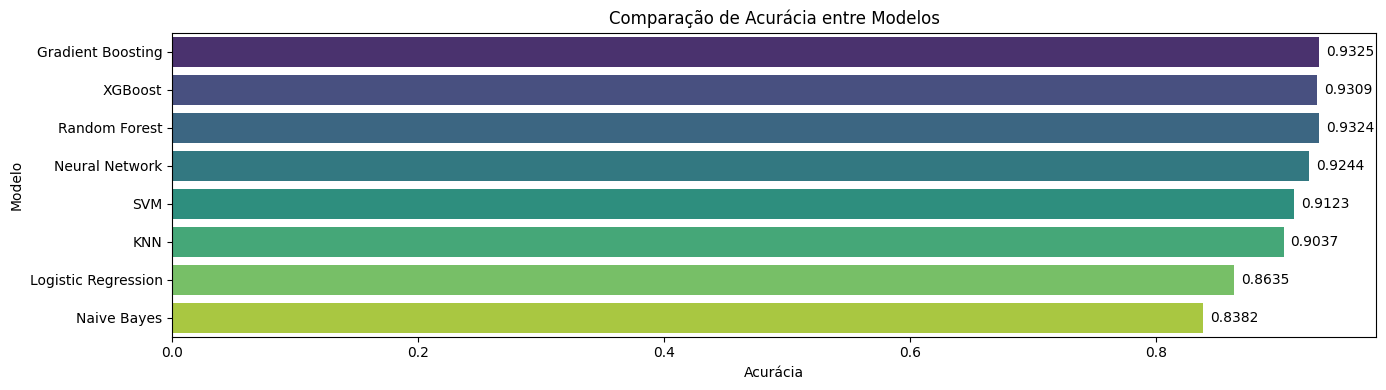

In [43]:
# Definir acurácias na ordem desejada
model_order = ['Gradient Boosting', 'XGBoost', 'Random Forest', 'Neural Network', 'SVM', 'KNN', 'Logistic Regression', 'Naive Bayes']
accuracies_ordered = [accuracy_gb, accuracy_xgb, accuracy_rf, accuracy_mlp, accuracy_svm, accuracy_knn, accuracy_ln, accuracy_nb]

# Criar DataFrame para facilitar a plotagem
df_accuracies = pd.DataFrame({'Modelo': model_order, 'Acurácia': accuracies_ordered})

# Plotar gráfico de barras horizontais com valores exatos
plt.figure(figsize=(14, 4))  # Ajuste o tamanho aqui
barplot = sns.barplot(x='Acurácia', y='Modelo', data=df_accuracies, palette='viridis')

# Adicionar valores exatos ao lado das barras
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.4f'), 
                     (p.get_width(), p.get_y() + p.get_height() / 2.), 
                     ha='left', va='center', 
                     xytext=(5, 0), 
                     textcoords='offset points')

plt.title('Comparação de Acurácia entre Modelos')
plt.tight_layout()
plt.show()


Podemos observar que a maioria dos modelos tiveram uma precisão em torno de 90%.

O modelo Gradient Boosting foi o que obteve uma melhor precisão (de 93.25%).

É importante também selecionar o modelo que melhor se encaixa no seu objetivo, talvez não seja simplesmente o modelo com a melhor precisão.